In [1]:
import scanpy as sc
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad('control_annotated_data.h5ad')

In [3]:
print(adata)

AnnData object with n_obs × n_vars = 96303 × 45947
    obs: 'cell_type_category', 'manuscript_id', 'subclass_id', 'disease', 'subject_id', 'age'
    var: 'HGNC_Alt_GeneID'


In [4]:
sc.pp.filter_cells(adata, min_genes=100, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [5]:
sc.pp.filter_genes(adata, min_cells=3, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [7]:
sc.pp.log1p(adata)

In [8]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

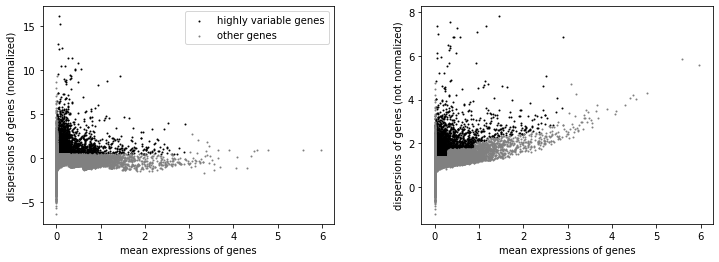

In [9]:
sc.pl.highly_variable_genes(adata)

In [10]:
adata = adata[:, adata.var.highly_variable]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [11]:
print(adata)

View of AnnData object with n_obs × n_vars = 96303 × 4443
    obs: 'cell_type_category', 'manuscript_id', 'subclass_id', 'disease', 'subject_id', 'age', 'n_genes'
    var: 'HGNC_Alt_GeneID', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


In [12]:
#sc.pp.scale(adata, max_value=10)

In [13]:
# Example Subsetting For Controls
#controls = adata[adata.obs['subject_id'].str[-1:] == 'C']

In [14]:
sc.tl.pca(adata, svd_solver='arpack')

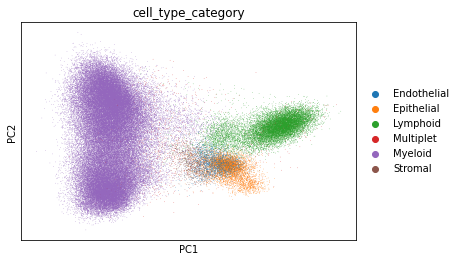

In [15]:
sc.pl.pca(adata, color='cell_type_category')

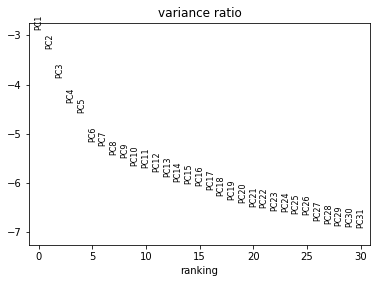

In [10]:
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [32]:
sc.tl.umap(adata)

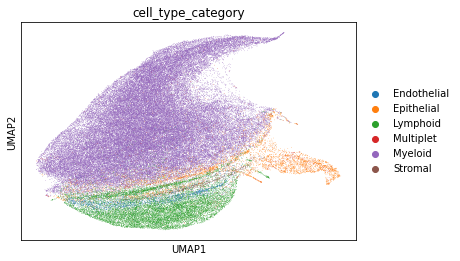

In [42]:
sc.pl.umap(adata, color=['cell_type_category'])

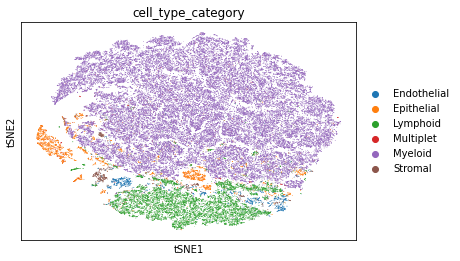

In [41]:
sc.tl.tsne(adata)
sc.pl.tsne(adata, color=['cell_type_category'])